In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

In [2]:
# średnia ruchoma dla przed pandemia
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)
przedpandemia.rename(columns={'Close*': 'Close'}, inplace=True)
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia.set_index('Date', inplace=True)
przedpandemia = przedpandemia.dropna()

okres_wma = 10

# ważona średnia ruchoma
przedpandemia['WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
print(przedpandemia[['Close', 'WMA']])

plt.figure(figsize=(10, 6))
plt.plot(przedpandemia.index, przedpandemia['Close'], label='Kurs zamknięcia (USD/EUR)')
plt.plot(przedpandemia.index, przedpandemia['WMA'], label=f'WMA ({okres_wma} dni)')
plt.title('Kurs zamknięcia USD/EUR i ważona średnia ruchoma')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)

plt.savefig('wma.png')
plt.close()

              Close       WMA
Date                         
2017-01-02  0.94994  0.949940
2017-01-03  0.95602  0.952980
2017-01-04  0.95970  0.955220
2017-01-05  0.95230  0.954490
2017-01-06  0.94287  0.952166
...             ...       ...
2019-11-25  0.90723  0.905341
2019-11-26  0.90790  0.905514
2019-11-27  0.90723  0.905430
2019-11-28  0.90869  0.905499
2019-11-29  0.90812  0.905571

[757 rows x 2 columns]


              Close       WMA
Date                         
2019-12-02  0.90752  0.907520
2019-12-03  0.90260  0.905060
2019-12-04  0.90210  0.904073
2019-12-05  0.90228  0.903625
2019-12-06  0.90046  0.902992
...             ...       ...
2021-12-27  0.88306  0.885270
2021-12-28  0.88261  0.884921
2021-12-29  0.88380  0.884501
2021-12-30  0.88027  0.883960
2021-12-31  0.88300  0.884031

[545 rows x 2 columns]


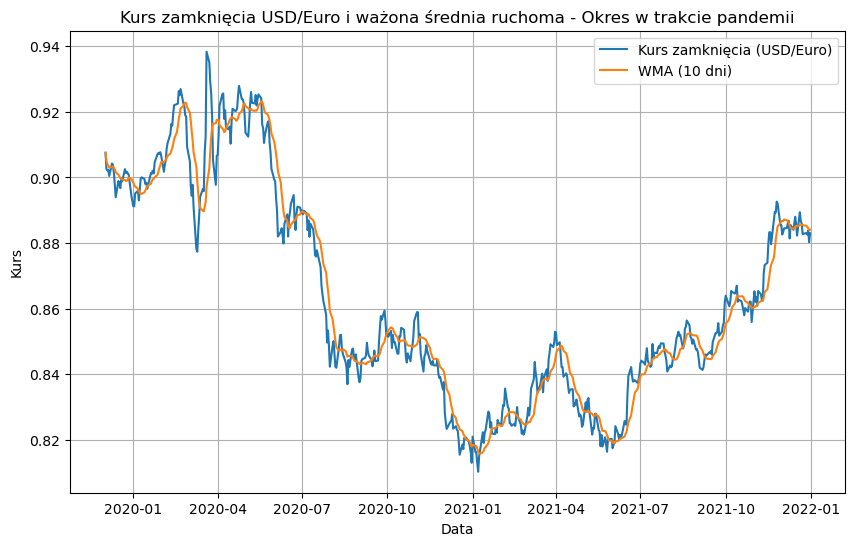

In [3]:
# średnia ruchoma dla w trakcie pandemii

file_path_wtrakciepandemii = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_wtrakciepandemii.csv'
wtrakciepandemii = pd.read_csv(file_path_wtrakciepandemii)
wtrakciepandemii.rename(columns={'Close*': 'Close'}, inplace=True)
wtrakciepandemii['Date'] = pd.to_datetime(wtrakciepandemii['Date'])
wtrakciepandemii.set_index('Date', inplace=True)

okres_wma = 10

# ważona średnia ruchoma
wtrakciepandemii['WMA'] = wtrakciepandemii['Close'].rolling(window=okres_wma, min_periods=1).mean()
print(wtrakciepandemii[['Close', 'WMA']])

plt.figure(figsize=(10, 6))
plt.plot(wtrakciepandemii.index, wtrakciepandemii['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.plot(wtrakciepandemii.index, wtrakciepandemii['WMA'], label=f'WMA ({okres_wma} dni)')
plt.title('Kurs zamknięcia USD/Euro i ważona średnia ruchoma - Okres w trakcie pandemii')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

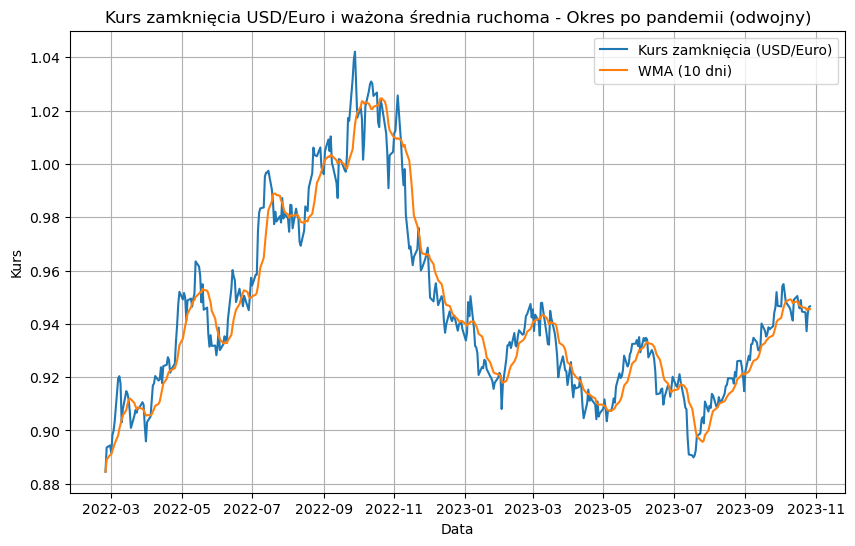

In [4]:
# średnia ruchoma dla od wojny

file_path_odwojny = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_odwojny.csv'
odwojny = pd.read_csv(file_path_odwojny)
odwojny.rename(columns={'Close*': 'Close'}, inplace=True)
odwojny['Date'] = pd.to_datetime(odwojny['Date'])
odwojny.set_index('Date', inplace=True)

okres_wma = 10 

# ważona średnia ruchoma
odwojny['WMA'] = odwojny['Close'].rolling(window=okres_wma, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(odwojny.index, odwojny['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.plot(odwojny.index, odwojny['WMA'], label=f'WMA ({okres_wma} dni)')
plt.title('Kurs zamknięcia USD/Euro i ważona średnia ruchoma - Okres po pandemii (odwojny)')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

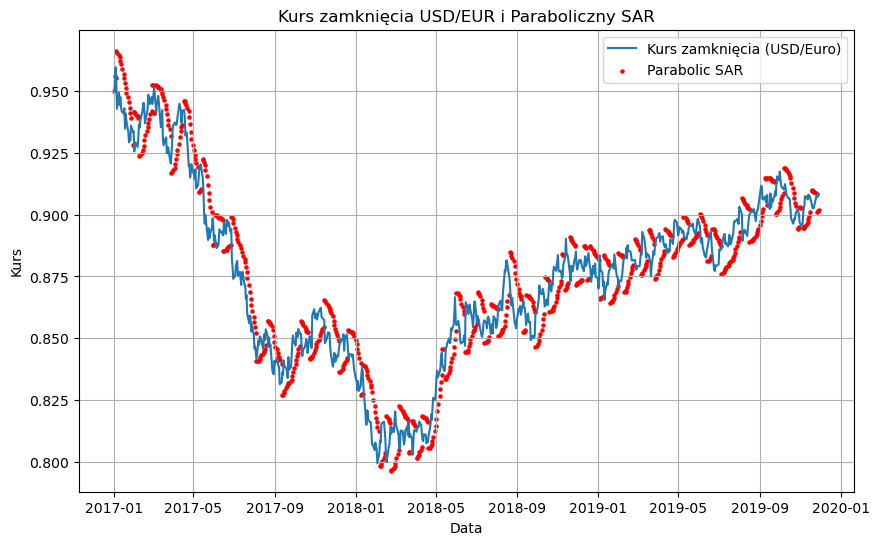

In [9]:
# parabolic SAR przed pandemią
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

plt.figure(figsize=(10, 6))
plt.plot(przedpandemia.index, przedpandemia['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.scatter(przedpandemia.index, przedpandemia['SAR'], marker='o', s=5, color='red', label='Parabolic SAR')
plt.title('Kurs zamknięcia USD/EUR i Paraboliczny SAR')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)

plt.show()
#plt.savefig('sar.png')
#plt.close()

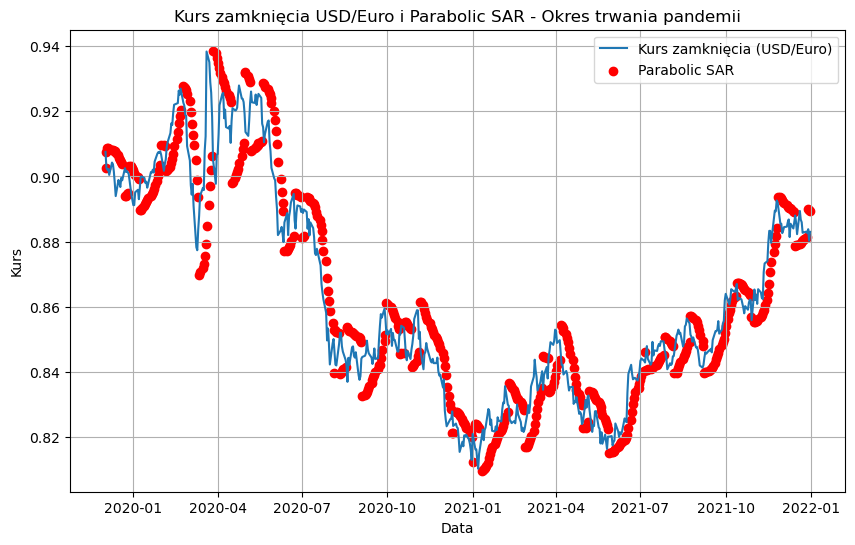

In [17]:
# parabolic SAR dla w trakcie pandemii
wtrakciepandemii['wtrakciepandemii_sar'] = ta.trend.PSARIndicator(high=wtrakciepandemii['High'], low=wtrakciepandemii['Low'], close=wtrakciepandemii['Close']).psar()

plt.figure(figsize=(10, 6))
plt.plot(wtrakciepandemii.index, wtrakciepandemii['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.scatter(wtrakciepandemii.index, wtrakciepandemii['wtrakciepandemii_sar'], marker='o', color='red', label='Parabolic SAR')
plt.title('Kurs zamknięcia USD/Euro i Parabolic SAR - Okres trwania pandemii')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

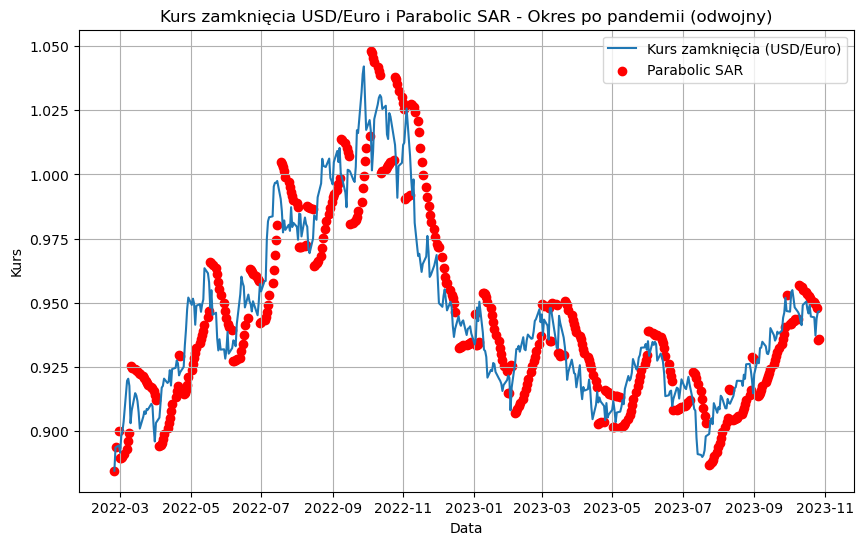

In [18]:
# parabolic SAR dla od wojny
odwojny['odwojny_sar'] = ta.trend.PSARIndicator(high=odwojny['High'], low=odwojny['Low'], close=odwojny['Close']).psar()

plt.figure(figsize=(10, 6))
plt.plot(odwojny.index, odwojny['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.scatter(odwojny.index, odwojny['odwojny_sar'], marker='o', color='red', label='Parabolic SAR')
plt.title('Kurs zamknięcia USD/Euro i Parabolic SAR - Okres po pandemii (odwojny)')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Wstęgi Bolingera przed pandemią

okres_sma = 20

# średnia krocząca
przedpandemia['SMA'] = przedpandemia['Close'].rolling(window=okres_sma).mean()

# odchylenie standardowe
przedpandemia['STD'] = przedpandemia['Close'].rolling(window=okres_sma).std()

# górna
przedpandemia['Upper'] = przedpandemia['SMA'] + 2 * przedpandemia['STD']

# dolna
przedpandemia['Lower'] = przedpandemia['SMA'] - 2 * przedpandemia['STD']

plt.figure(figsize=(10, 6))
plt.plot(przedpandemia.index, przedpandemia['Close'], label='Kurs zamknięcia (USD/EUR)')
plt.plot(przedpandemia.index, przedpandemia['SMA'], label=f'Średnia krocząca {okres_sma} dni')
plt.plot(przedpandemia.index, przedpandemia['Upper'], label='Górna wstęga Bollingera')
plt.plot(przedpandemia.index, przedpandemia['Lower'], label='Dolna wstęga Bollingera')

plt.title('Wstęgi Bollingera')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)

plt.savefig('wstegi.png')
plt.close()

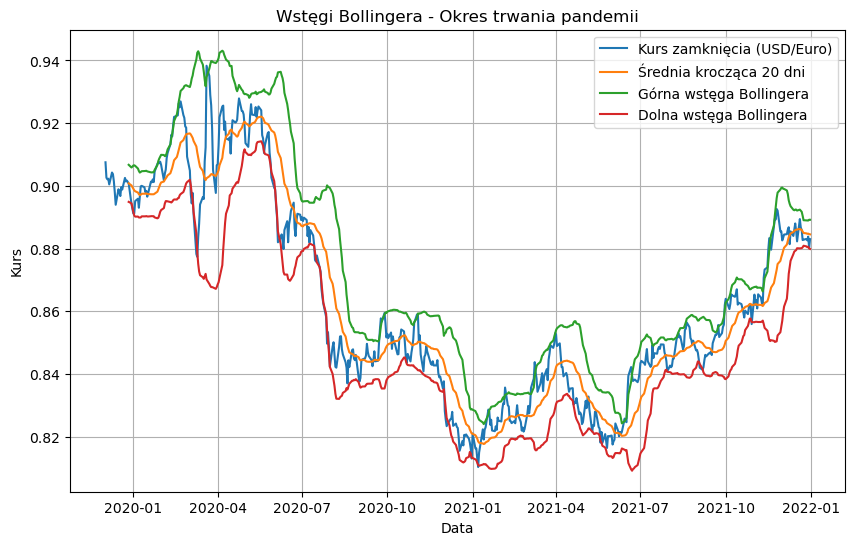

In [10]:
# Wstęgi Bolingera pandemia

okres_sma = 20

# średnia krocząca
wtrakciepandemii['SMA'] = wtrakciepandemii['Close'].rolling(window=okres_sma).mean()

#odchylenie standardowe
wtrakciepandemii['STD'] = wtrakciepandemii['Close'].rolling(window=okres_sma).std()

# górna
wtrakciepandemii['Upper'] = wtrakciepandemii['SMA'] + 2 * wtrakciepandemii['STD']

# dolna
wtrakciepandemii['Lower'] = wtrakciepandemii['SMA'] - 2 * wtrakciepandemii['STD']

plt.figure(figsize=(10, 6))
plt.plot(wtrakciepandemii.index, wtrakciepandemii['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.plot(wtrakciepandemii.index, wtrakciepandemii['SMA'], label=f'Średnia krocząca {okres_sma} dni')
plt.plot(wtrakciepandemii.index, wtrakciepandemii['Upper'], label='Górna wstęga Bollingera')
plt.plot(wtrakciepandemii.index, wtrakciepandemii['Lower'], label='Dolna wstęga Bollingera')

plt.title('Wstęgi Bollingera - Okres trwania pandemii')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()

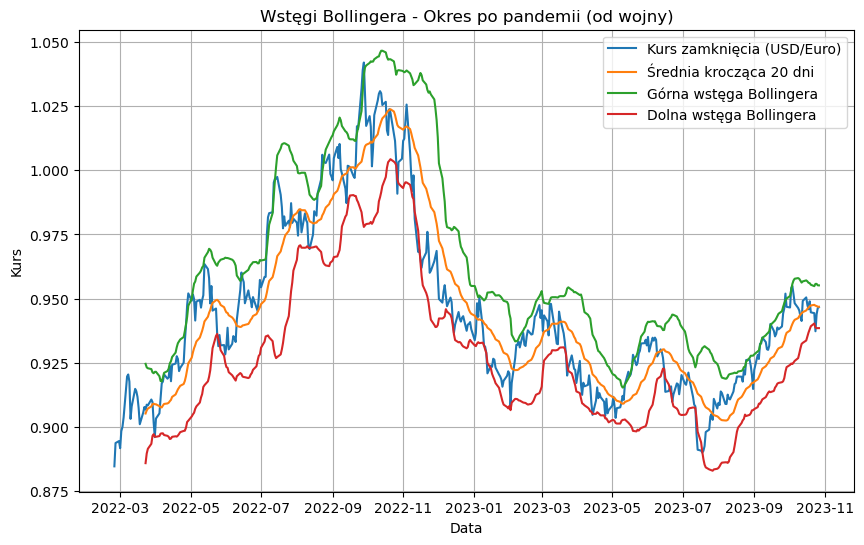

In [11]:
# Wstęgi Bolingera od wojny

okres_sma = 20

# średnia krocząca
odwojny['SMA'] = odwojny['Close'].rolling(window=okres_sma).mean()

# odchylenie standardowe
odwojny['STD'] = odwojny['Close'].rolling(window=okres_sma).std()

# górna
odwojny['Upper'] = odwojny['SMA'] + 2 * odwojny['STD']

# dolna
odwojny['Lower'] = odwojny['SMA'] - 2 * odwojny['STD']

plt.figure(figsize=(10, 6))
plt.plot(odwojny.index, odwojny['Close'], label='Kurs zamknięcia (USD/Euro)')
plt.plot(odwojny.index, odwojny['SMA'], label=f'Średnia krocząca {okres_sma} dni')
plt.plot(odwojny.index, odwojny['Upper'], label='Górna wstęga Bollingera')
plt.plot(odwojny.index, odwojny['Lower'], label='Dolna wstęga Bollingera')

plt.title('Wstęgi Bollingera - Okres po pandemii (od wojny)')
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()